In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv("UNSW_NB15.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [4]:
df.shape

(175341, 45)

In [5]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [6]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
train = df.replace('-', pd.NA).dropna()

In [8]:
train.shape

(81173, 45)

In [9]:
print(train['proto'])

3         tcp
11        tcp
15        udp
17        tcp
21        tcp
         ... 
175335    udp
175336    udp
175338    udp
175339    udp
175340    udp
Name: proto, Length: 81173, dtype: object


In [10]:
value_counts_result = train['proto'].value_counts()

# Afficher le résultat complet, même s'il y a beaucoup de données
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(value_counts_result)

proto
udp    47435
tcp    33738
Name: count, dtype: int64


attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

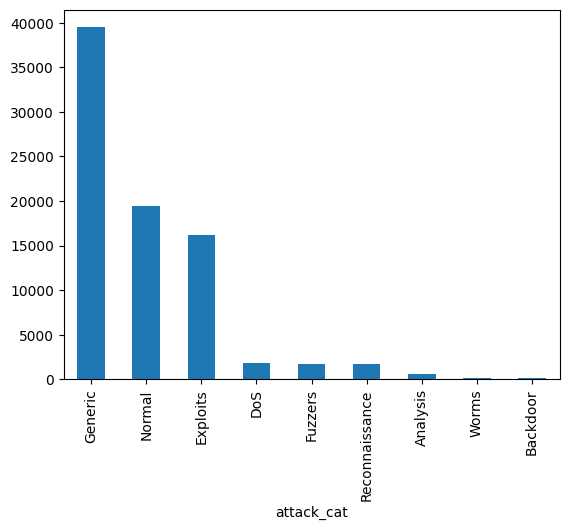

In [11]:
train["attack_cat"].value_counts().plot.bar()
train['attack_cat'].value_counts()

([<matplotlib.patches.Wedge at 0x2e3070153a0>,
 [Text(-0.7532028705720235, -0.8016766403993968, 'Attaque'),
  Text(0.7532028330428306, 0.801676675659367, 'Normal')],
 [Text(-0.41083792940292185, -0.43727816749058007, '76.0%'),
  Text(0.41083790893245303, 0.437278186723291, '24.0%')])

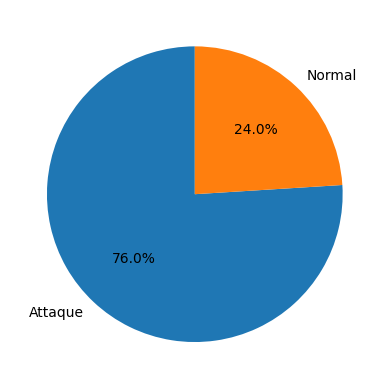

In [12]:
# Définissez les étiquettes pour les valeurs 0 et 1
labels = ['Attaque', 'Normal']
value_counts = train["label"].value_counts(normalize=True)
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)

state
INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: count, dtype: int64

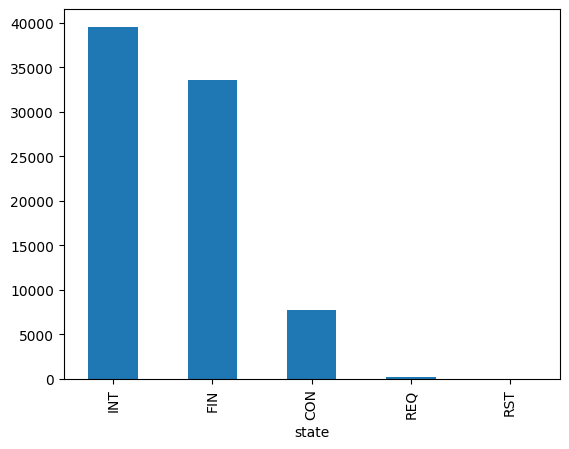

In [13]:
train["state"].value_counts().plot.bar()
train['state'].value_counts()

service
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

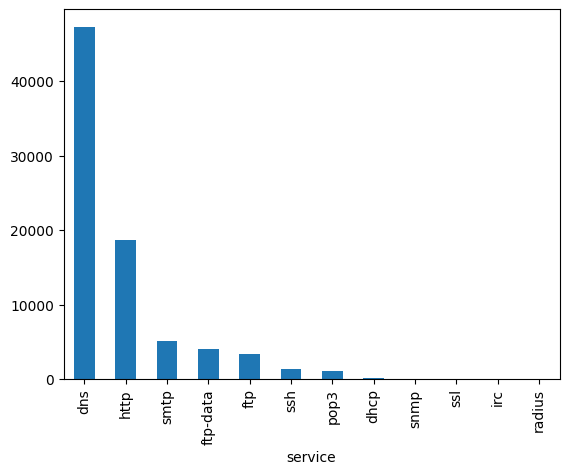

In [14]:
train["service"].value_counts().plot.bar()
train['service'].value_counts()

In [15]:
# explorer les caractéristiques catégorielles
print('Ensemble d\'entraînement:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("La caractéristique '{col_name}' a {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Ensemble d'entraînement:
La caractéristique 'proto' a 2 categories
La caractéristique 'service' a 12 categories
La caractéristique 'state' a 5 categories
La caractéristique 'attack_cat' a 9 categories


In [16]:
train = train.drop(columns=['attack_cat'])

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['proto', 'service', 'state']

train_categorical_values = train[categorical_columns]
print(train_categorical_values.head())

   proto service state
3    tcp     ftp   FIN
11   tcp    smtp   FIN
15   udp    snmp   INT
17   tcp    http   FIN
21   tcp    http   FIN


In [18]:
train_enc=train_categorical_values.apply(LabelEncoder().fit_transform)

print(train_categorical_values.head())
print('--------------------')
print(train_enc.head())

   proto service state
3    tcp     ftp   FIN
11   tcp    smtp   FIN
15   udp    snmp   INT
17   tcp    http   FIN
21   tcp    http   FIN
--------------------
    proto  service  state
3       0        2      1
11      0        8      1
15      1        9      2
17      0        4      1
21      0        4      1


In [19]:
# Colonnes à remplacer
colonnes_a_remplacer = ['proto', 'service', 'state']
# Remplacer les valeurs dans data1 par celles de data2
train[colonnes_a_remplacer] = train_enc[colonnes_a_remplacer]

train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
3,4,1.681642,0,2,1,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,0
11,12,2.093085,0,8,1,62,28,56329,2212,42.520967,...,1,1,2,0,0,0,1,1,0,0
15,16,0.000002,1,9,2,2,0,138,0,500000.001300,...,1,1,4,0,0,0,2,1,0,0
17,18,0.393556,0,4,1,10,8,860,1096,43.195886,...,1,1,2,0,0,1,1,3,0,0
21,22,0.338017,0,4,1,10,6,998,268,44.376468,...,1,1,1,0,0,1,2,3,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler().fit(train)
Scaler.transform(train)

array([[-1.92978879,  0.17467783, -1.18574086, ..., -0.92730308,
         0.        , -1.77912372],
       [-1.92964169,  0.26608059, -1.18574086, ..., -0.92730308,
         0.        , -1.77912372],
       [-1.92956813, -0.19890138,  0.84335459, ..., -0.92730308,
         0.        , -1.77912372],
       ...,
       [ 1.29427751, -0.19889983,  0.84335459, ..., -0.11028153,
         0.        ,  0.56207446],
       [ 1.2942959 , -0.19889983,  0.84335459, ...,  1.22666284,
         0.        ,  0.56207446],
       [ 1.29431429, -0.19889983,  0.84335459, ...,  1.22666284,
         0.        ,  0.56207446]])

In [21]:
from sklearn.preprocessing import Normalizer
Scaler=Normalizer().fit(train)
Scaler.transform(train)

array([[2.62451740e-09, 1.10337467e-09, 0.00000000e+00, ...,
        6.56129351e-10, 0.00000000e+00, 0.00000000e+00],
       [5.94785320e-09, 1.03744686e-09, 0.00000000e+00, ...,
        4.95654434e-10, 0.00000000e+00, 0.00000000e+00],
       [5.79709194e-08, 7.24636492e-15, 3.62318246e-09, ...,
        3.62318246e-09, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.46060930e-03, 1.77630098e-13, 1.97366775e-08, ...,
        2.36840130e-07, 0.00000000e+00, 1.97366775e-08],
       [3.46062903e-03, 1.77630098e-13, 1.97366775e-08, ...,
        5.92100325e-07, 0.00000000e+00, 1.97366775e-08],
       [3.46064877e-03, 1.77630097e-13, 1.97366775e-08, ...,
        5.92100325e-07, 0.00000000e+00, 1.97366775e-08]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)

array([[0.00000000e+00, 2.80277961e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.56264223e-05, 3.48852886e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.84396334e-05, 1.66669319e-08, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99988593e-01, 1.33335456e-07, 1.00000000e+00, ...,
        2.15686275e-01, 0.00000000e+00, 1.00000000e+00],
       [9.99994297e-01, 1.33335456e-07, 1.00000000e+00, ...,
        5.68627451e-01, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.33335456e-07, 1.00000000e+00, ...,
        5.68627451e-01, 0.00000000e+00, 1.00000000e+00]])

In [23]:
# Liste des colonnes importantes pour la détection d'attaques
colonnes_importants = ['dur','proto', 'service', 'state', 'rate', 'sttl', 'dload', 'swin', 'dwin', 'ackdat', 'dmean', 'ct_srv_src', 'ct_state_ttl','ct_dst_ltm', 'ct_src_dport_ltm',
                       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'label']
# Supprimer toutes les colonnes sauf celles qui sont importantes
colonnes_a_supprimer = [colonne for colonne in train.columns if colonne not in colonnes_importants]
train = train.drop(columns=colonnes_a_supprimer)

In [24]:
train

,dur,proto,service,state,rate,sttl,dload,swin,dwin,ackdat,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
3,1.681642,0,2,1,13.677108,62,3358.622070,255,255,0.000000,64,1,1,2,1,1,3,2,1,0
11,2.093085,0,8,1,42.520967,62,8152.559082,255,255,0.078288,79,2,1,1,1,1,2,1,1,0
15,0.000002,1,9,2,500000.001300,254,0.000000,0,0,0.000000,0,1,2,1,1,1,4,2,1,0
17,0.393556,0,4,1,43.195886,62,19494.048830,255,255,0.061112,137,3,1,1,1,1,2,1,3,0
21,0.338017,0,4,1,44.376468,254,5301.508789,255,255,0.099324,45,6,1,1,1,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000006,1,1,2,166666.660800,254,0.000000,0,0,0.000000,0,45,2,33,33,17,45,33,45,1
175336,0.000009,1,1,2,111111.107200,254,0.000000,0,0,0.000000,0,24,2,24,24,13,24,24,24,1
175338,0.000009,1,1,2,111111.107200,254,0.000000,0,0,0.000000,0,12,2,3,3,3,13,3,12,1
175339,0.000009,1,1,2,111111.107200,254,0.000000,0,0,0.000000,0,30,2,30,30,14,30,30,30,1


state
2    39580
1    33640
0     7711
3      228
4       14
Name: count, dtype: int64

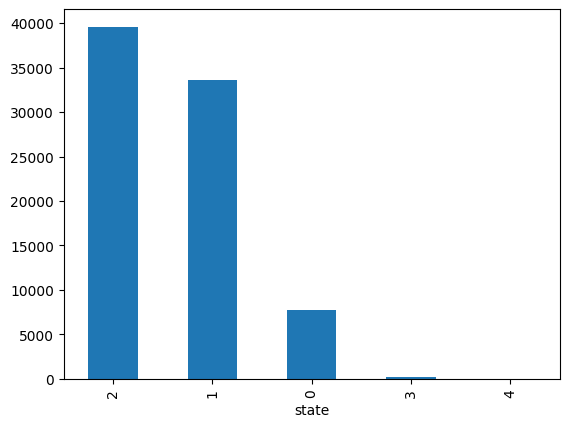

In [25]:
train["state"].value_counts().plot.bar()
train['state'].value_counts()

In [26]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test
X = train.drop(columns=['label'])  # Caractéristiques
y = train['label']  # Variable cible
# Fractionnement des données en train et ensemble de test 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (56821, 19)
Forme de X_test : (24352, 19)
Forme de y_train : (56821,)
Forme de y_test : (24352,)


modele XGBCLASSIFIER

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9854632063074902
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      5876
           1       0.99      0.99      0.99     18476

    accuracy                           0.99     24352
   macro avg       0.98      0.98      0.98     24352
weighted avg       0.99      0.99      0.99     24352


Recall  0.9925308508335138
F1- Score   0.9904401836348906

Temps d'exécution Détection de primitives : 1.4616024494171143 secondes


[[ 5660   216]
 [  138 18338]]


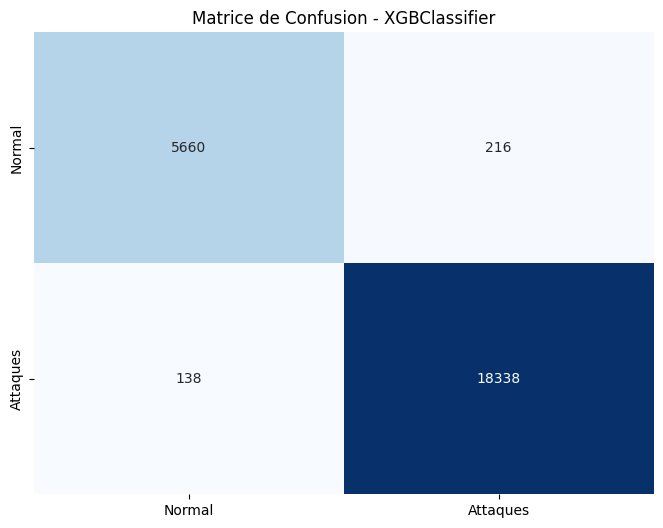

In [28]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

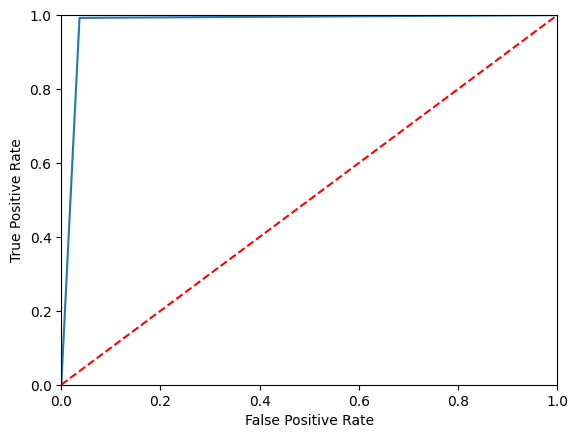

Area Under the Curve  0.9778855751784996


In [29]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

In [30]:
import pickle

In [31]:
with open('XGBClassifier.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(xgb_model, file)

modèle Régression logistique

In [32]:
from sklearn.linear_model import LogisticRegression
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 0.93
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      5876
           1       0.92      0.99      0.95     18476

    accuracy                           0.93     24352
   macro avg       0.94      0.86      0.89     24352
weighted avg       0.93      0.93      0.92     24352


Recall  0.9880385364797575
F1- Score   0.9539860468762249

Temps d'exécution Détection de primitives : 2.2852578163146973 secondes


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 4336  1540]
 [  221 18255]]


<function matplotlib.pyplot.show(close=None, block=None)>

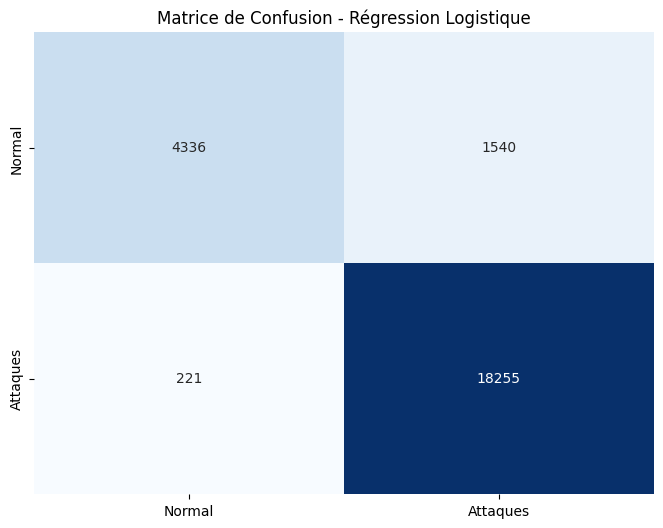

In [33]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

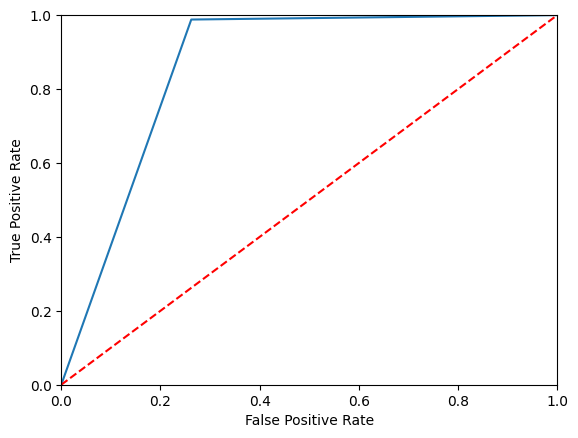

Area Under the Curve  0.8629777433930441


In [34]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

In [35]:
with open('LogisticRegression.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(logistic_model, file)

modele Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9847240473061761
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      5876
           1       0.99      0.99      0.99     18476

    accuracy                           0.98     24352
   macro avg       0.98      0.97      0.98     24352
weighted avg       0.98      0.98      0.98     24352


Recall  0.994208703182507
F1- Score   0.9899757477768795

Temps d'exécution Détection de primitives : 10.265439987182617 secondes


[[ 5611   265]
 [  107 18369]]


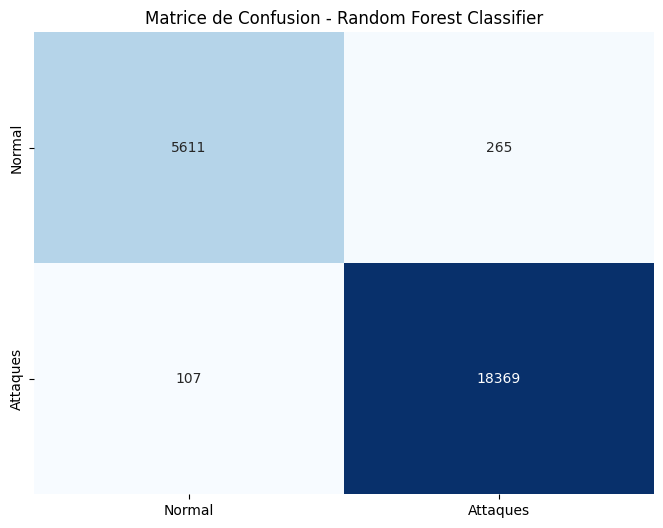

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

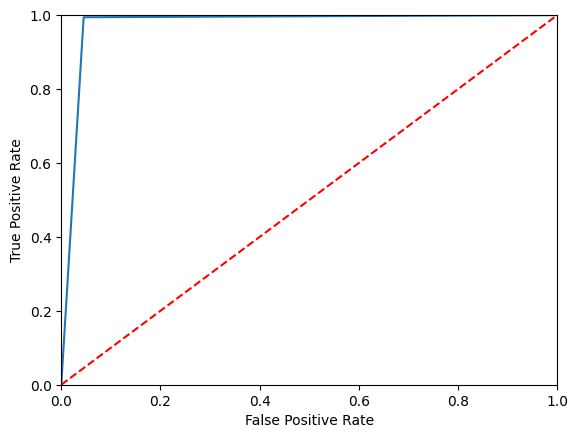

Area Under the Curve  0.9745549982896877


In [38]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

In [39]:
with open('RandomForestClassifier.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(rf_classifier, file)

modele Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9789339684625493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      5876
           1       0.97      1.00      0.99     18476

    accuracy                           0.98     24352
   macro avg       0.99      0.96      0.97     24352
weighted avg       0.98      0.98      0.98     24352


Recall  1.0
F1- Score   0.9863072200720672

Temps d'exécution Détection de primitives : 0.7076964378356934 secondes


[[ 5363   513]
 [    0 18476]]


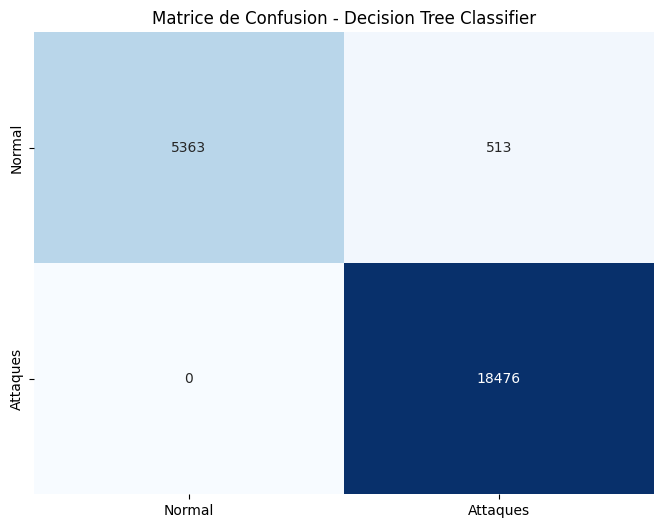

In [42]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

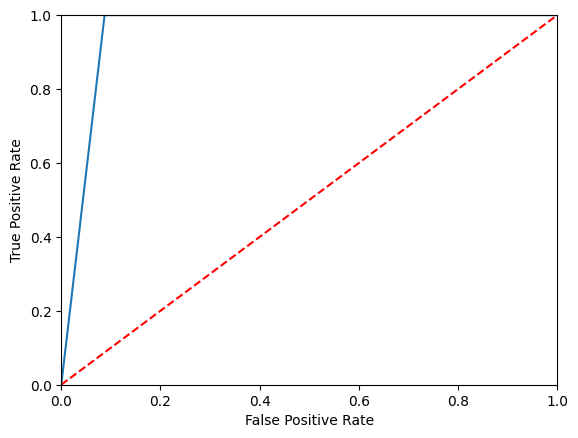

Area Under the Curve  0.9563478556841389


In [43]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

In [44]:
with open('DecisionTreeClassifier.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(DecisionTree, file)

Modele Support Vector Machines

In [46]:
from sklearn.svm import SVC
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.877258541392904
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      5876
           1       0.89      0.96      0.92     18476

    accuracy                           0.88     24352
   macro avg       0.86      0.79      0.82     24352
weighted avg       0.87      0.88      0.87     24352


Recall  0.9584866854297467
F1- Score   0.9221756450647017

Temps d'exécution Détection de primitives : 306.7502977848053 secondes


[[ 3654  2222]
 [  767 17709]]


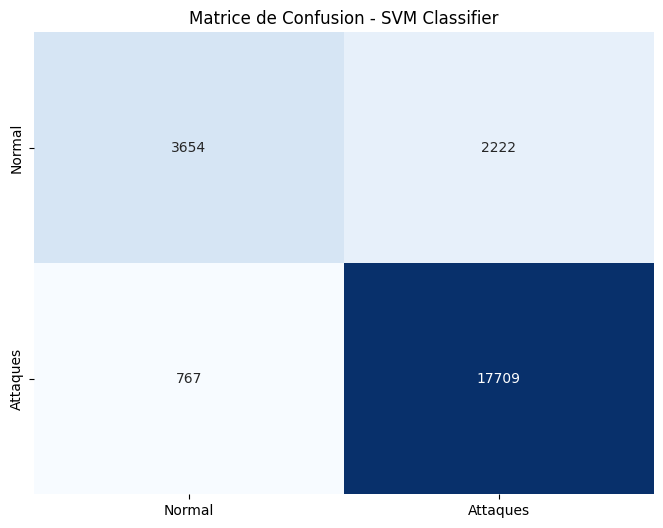

In [47]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

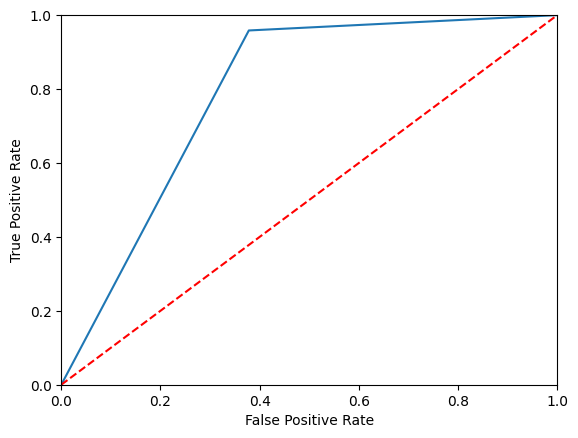

Area Under the Curve  0.7901691425787263


In [48]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

In [49]:
with open('SVM.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(SVM, file)